In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
# TODO popsat EDA
file_path = 'pokemon.csv'
df = pd.read_csv(file_path, index_col=False, low_memory=False,)

# EDA

In [59]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [60]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


(   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
 0  1              Bulbasaur  Grass  Poison    318  45      49       49   
 1  2                Ivysaur  Grass  Poison    405  60      62       63   
 2  3               Venusaur  Grass  Poison    525  80      82       83   
 3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
 4  4             Charmander   Fire     NaN    309  39      52       43   
 
    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
 0       65       65     45           1      False  
 1       80       80     60           1      False  
 2      100      100     80           1      False  
 3      122      120     80           1      False  
 4       60       50     65           1      False  ,
 None)

In [61]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [62]:
df['Type 1'].unique()
# len(df['Type 1'].unique()) = 18

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [63]:
df['Type 2'].unique()
# len(df['Type 2'].unique()) = 19

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [64]:
# prompt: find me attributes that is only in Type 1 xor Type 2

type1_unique = set(df['Type 1'].unique())
type2_unique = set(df['Type 2'].unique())

# Attributes only in Type 1
only_type1 = type1_unique - type2_unique
print("Attributes only in Type 1:", only_type1)

# Attributes only in Type 2
only_type2 = type2_unique - type1_unique
print("Attributes only in Type 2:", only_type2)

Attributes only in Type 1: set()
Attributes only in Type 2: {nan}


In [65]:
df['Name'].unique()

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'VenusaurMega Venusaur',
       'Charmander', 'Charmeleon', 'Charizard',
       'CharizardMega Charizard X', 'CharizardMega Charizard Y',
       'Squirtle', 'Wartortle', 'Blastoise', 'BlastoiseMega Blastoise',
       'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna',
       'Beedrill', 'BeedrillMega Beedrill', 'Pidgey', 'Pidgeotto',
       'Pidgeot', 'PidgeotMega Pidgeot', 'Rattata', 'Raticate', 'Spearow',
       'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew',
       'Sandslash', 'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂',
       'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix',
       'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat',
       'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat',
       'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra',

## Kontrola chybějících hodnot

In [66]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


## Kontrola zduplikovaných hodnot

In [67]:
df.duplicated().sum()

0

## Datové typy

In [68]:
df.dtypes

,0
#,int64
Name,object
Type 1,object
Type 2,object
Total,int64
HP,int64
Attack,int64
Defense,int64
Sp. Atk,int64
Sp. Def,int64


|Atribut|	Datový typ|Popis|
| --------      | -------    |-------        |
| hashtag| int64 | Unikátní ID každého Pokémona |
|Name|	object |Jméno každého Pokémona|
|Type 1|	object|Hlavní typ Pokémona, který určuje jeho |slabosti/odolnosti vůči útokům|
|Type 2| object |	Druhý typ (pokud má Pokémon dvojí typ)|
| Total	| int64 |Součet všech statistik uvedených níže, obecný ukazatel síly Pokémona|
| HP	| int64|Počet životů (hit points), určuje, kolik poškození Pokémon snese, než omdlí|
|Attack	|int64|Základní hodnota pro běžné útoky (např. Škrábnutí, Úder)
|Defense	|int64|Základní odolnost proti běžným útokům
|SP Atk|int64	|Speciální útok, základní hodnota pro speciální útoky (např. Ohnivý výbuch, Vodní dělo)
|SP Def	|int64|Základní odolnost proti speciálním útokům
|Speed	|int64|Rychlost, určuje, který Pokémon zaútočí první v každém kole
| Generation |int64| Generace, ve které byl Pokémon představen (např. 1 = první generace, 2 = druhá generace)|
| Legendary | bool | určuje, zda je Pokémon legendární (vzácný)


## Zjištění unikátních hodnot

In [69]:
df.nunique()

,0
#,721
Name,800
Type 1,18
Type 2,18
Total,200
HP,94
Attack,111
Defense,103
Sp. Atk,105
Sp. Def,92


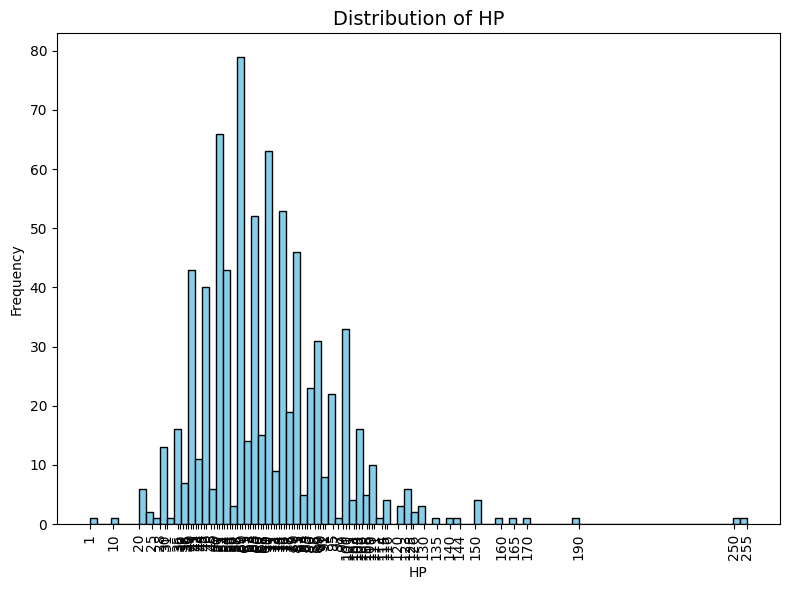

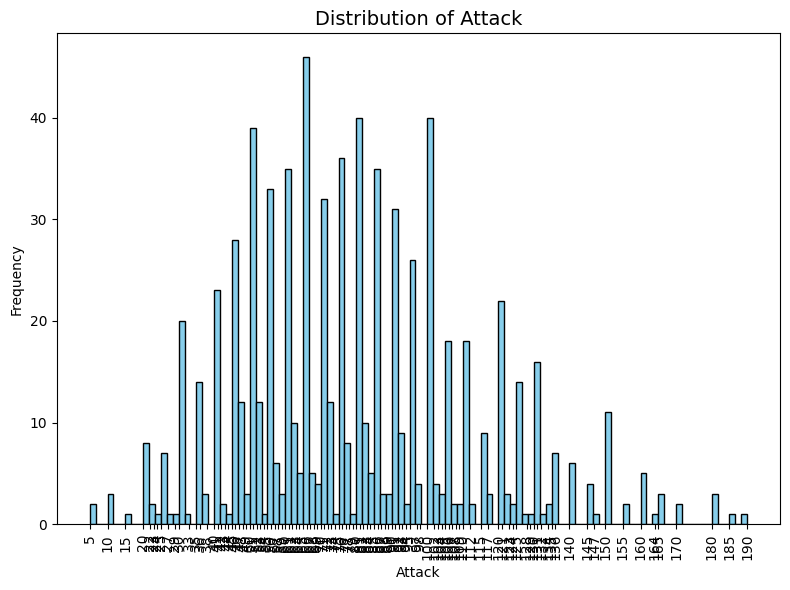

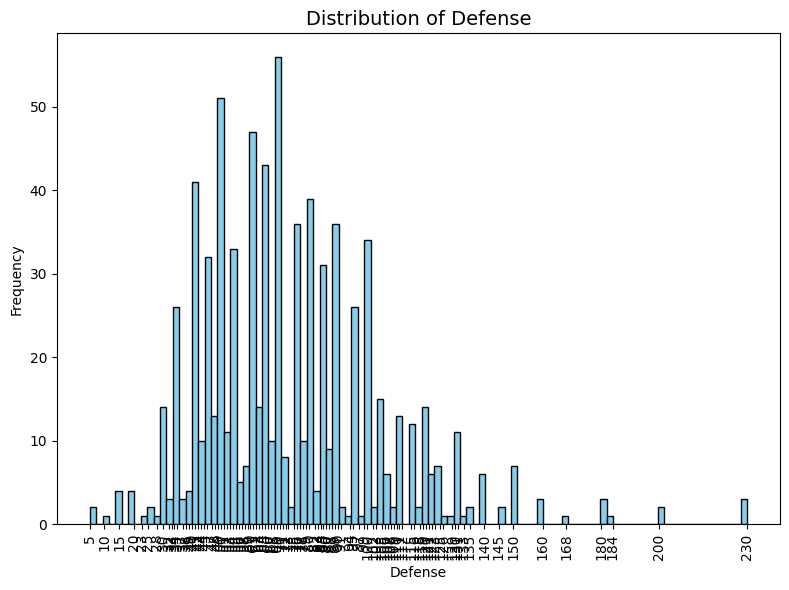

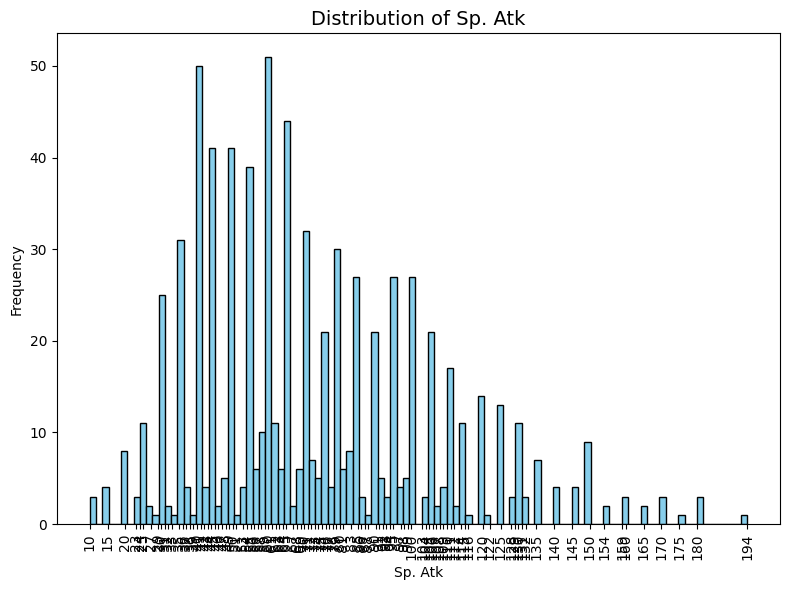

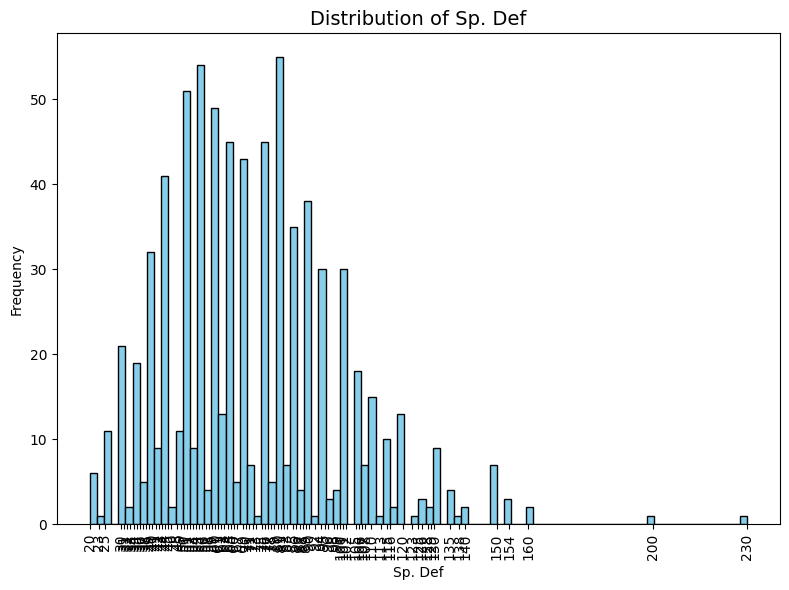

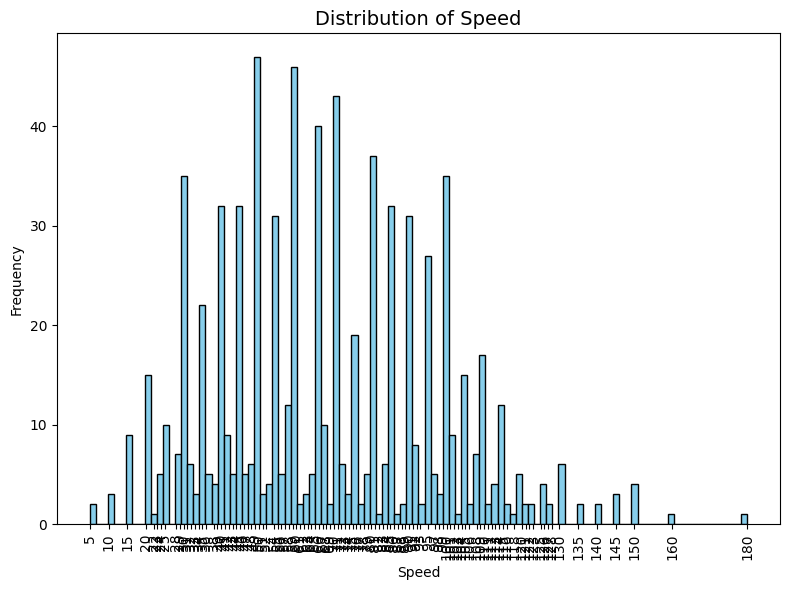

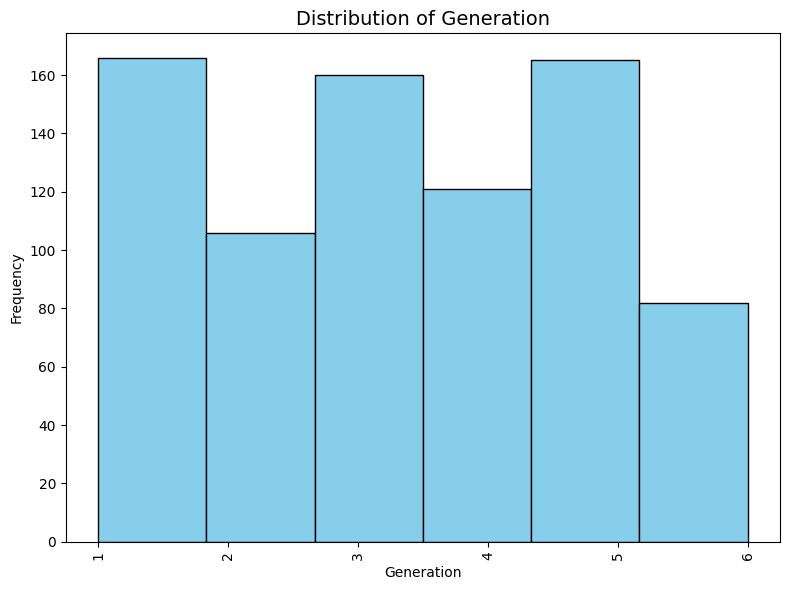

In [70]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(8, 6))
  data = df[attribute].dropna()  # Remove NaN values
  plt.hist(data, bins=len(data.unique()), color='skyblue', edgecolor='black', align='mid')

  # Set x-axis ticks to show whole numbers
  plt.xticks(sorted(data.unique()), rotation=90)  # Sort to ensure proper order
  plt.title(f'Distribution of {attribute}', fontsize=14)
  plt.xlabel(f'{attribute}')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()


In [71]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6
796,719,700,50,160,110,160,110,110,6
797,720,600,80,110,60,150,130,70,6
798,720,680,80,160,60,170,130,80,6


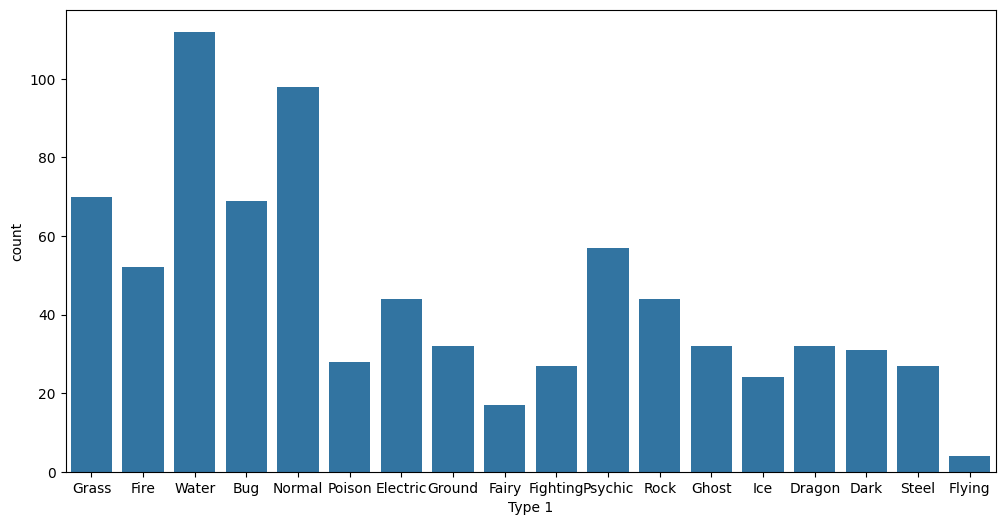

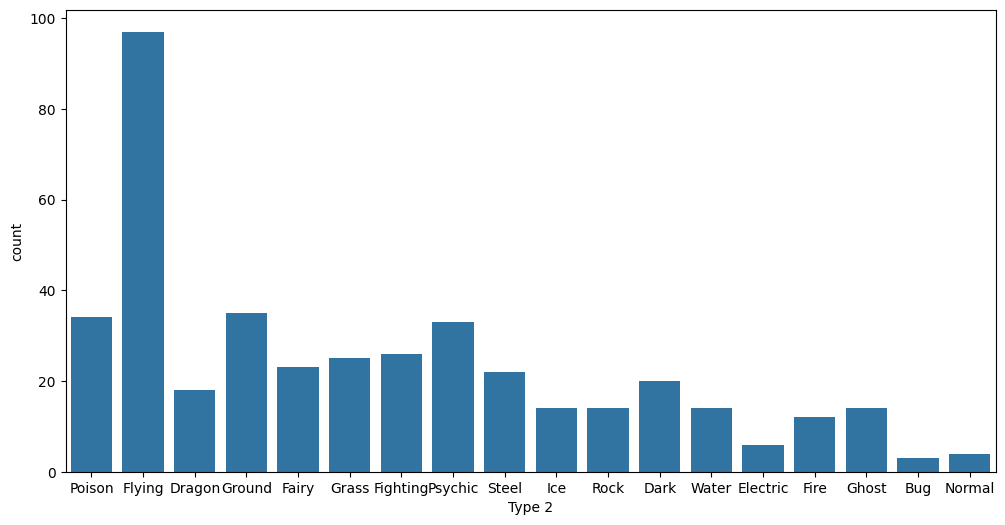

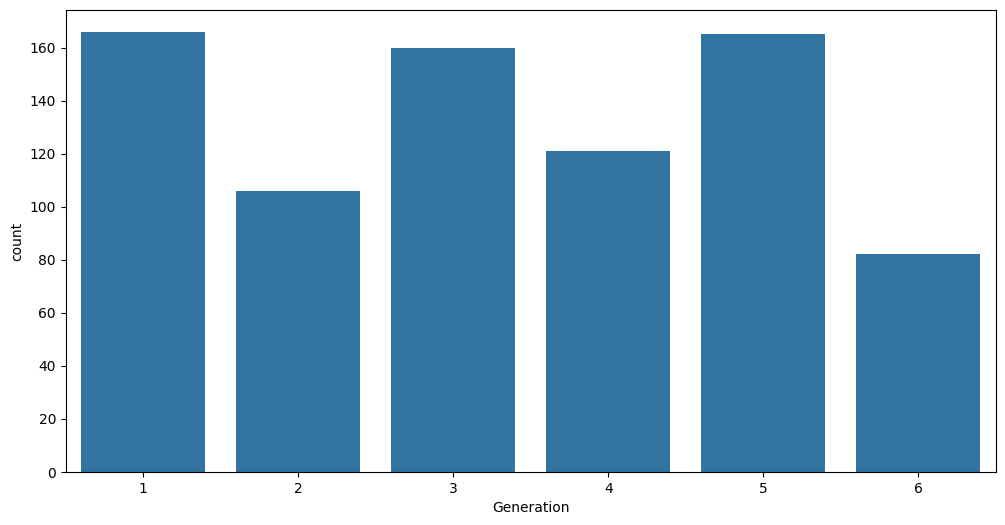

In [72]:
# countplot
attributes = ['Type 1', 'Type 2', 'Generation']
for attribute in attributes:
  plt.figure(figsize=(12, 6))
  sns.countplot(data=df, x=attribute)

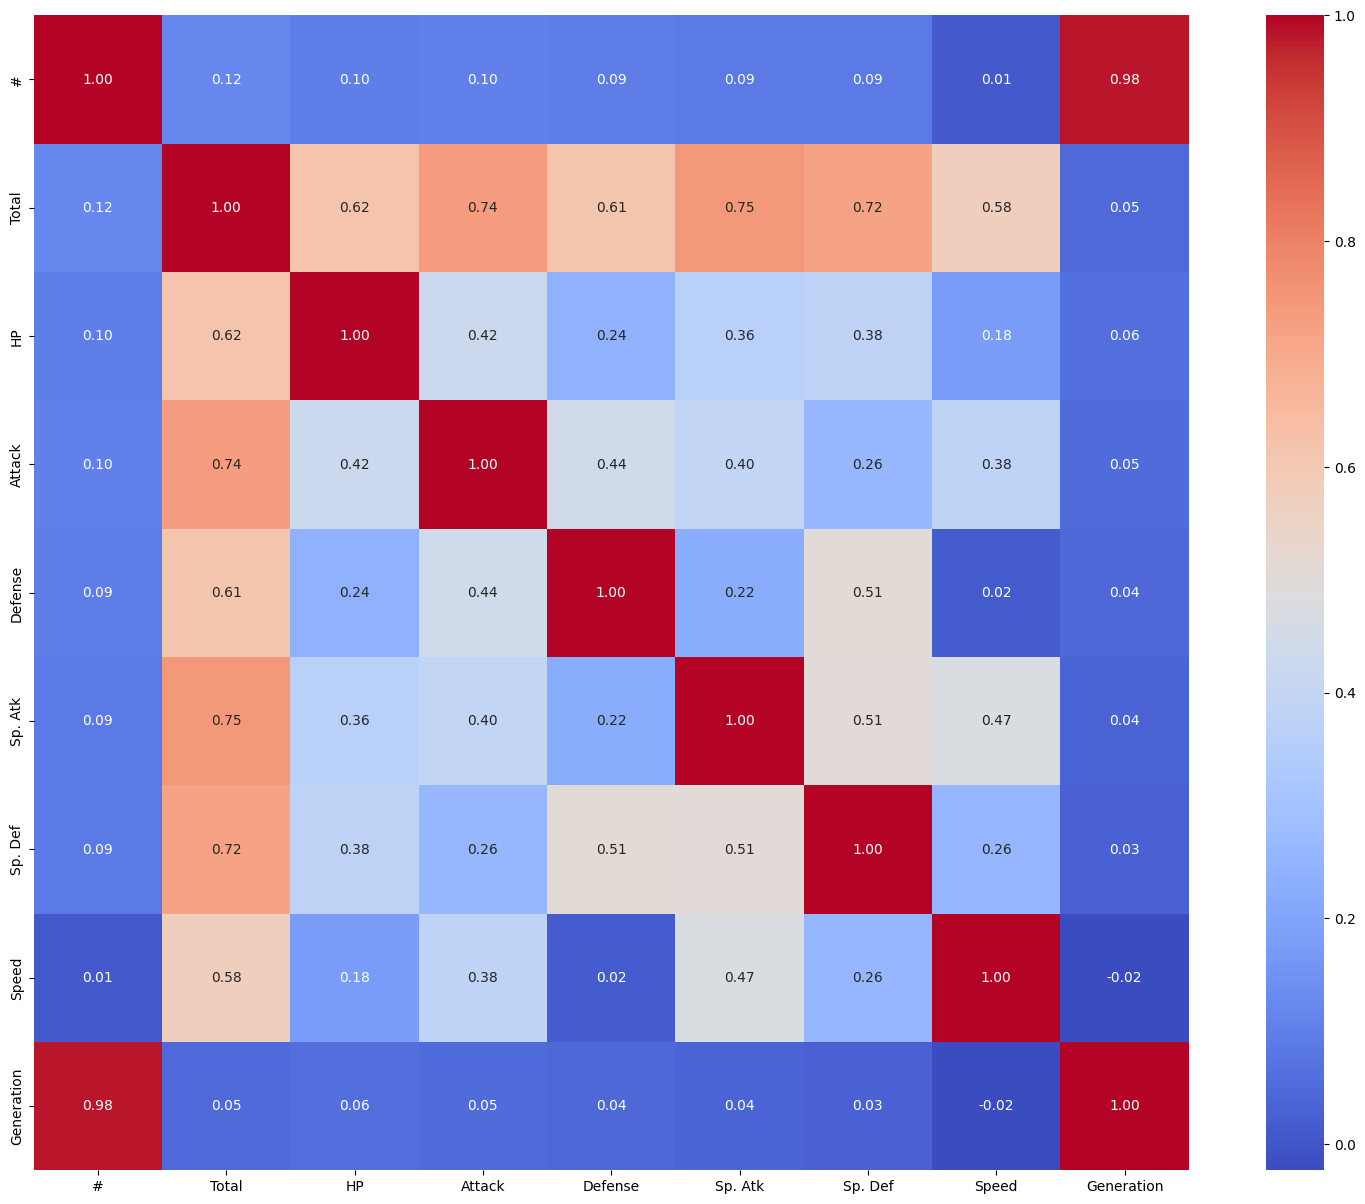

In [73]:
corr_mat = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.2f')

plt.show()

# Pre-processing

Atributy 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed' mají normální rozdělení, proto bude v pre-processing části použit StandardScaler

In [74]:
standard_scaler = StandardScaler()
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for attribute in attributes:
  df[attribute] = standard_scaler.fit_transform(df[[attribute]])

Atribut "Generation" lze převést pomocí One-Hot Encoding každou generaci na samostatný binární atribut. Tím v dalších krocích modelům umožníme pracovat s tímto atributem jako s kategorií.

To samé platí pro sloupce Type 1 a Type 2.

In [75]:
pokemon_data = df

# One-Hot Encoding for "Generation"
generation_encoded = pd.get_dummies(pokemon_data['Generation'], prefix='Generation')

# One-Hot Encoding for "Type 1" and "Type 2"
type1_encoded = pd.get_dummies(pokemon_data['Type 1'], prefix='Type1')
type2_encoded = pd.get_dummies(pokemon_data['Type 2'], prefix='Type2')

# Combine the new columns with the original dataset
pokemon_data_encoded = pd.concat([pokemon_data, generation_encoded, type1_encoded, type2_encoded], axis=1)

# Drop original "Generation", "Type 1", and "Type 2" columns
pokemon_data_encoded.drop(['Generation', 'Type 1', 'Type 2'], axis=1, inplace=True)

# Update the dataset
df = pokemon_data_encoded

Atributy "#" a "Name" nejsou důležité pro následující zpracování dat.

In [76]:
df = df.drop(['#', 'Name'], axis=1)

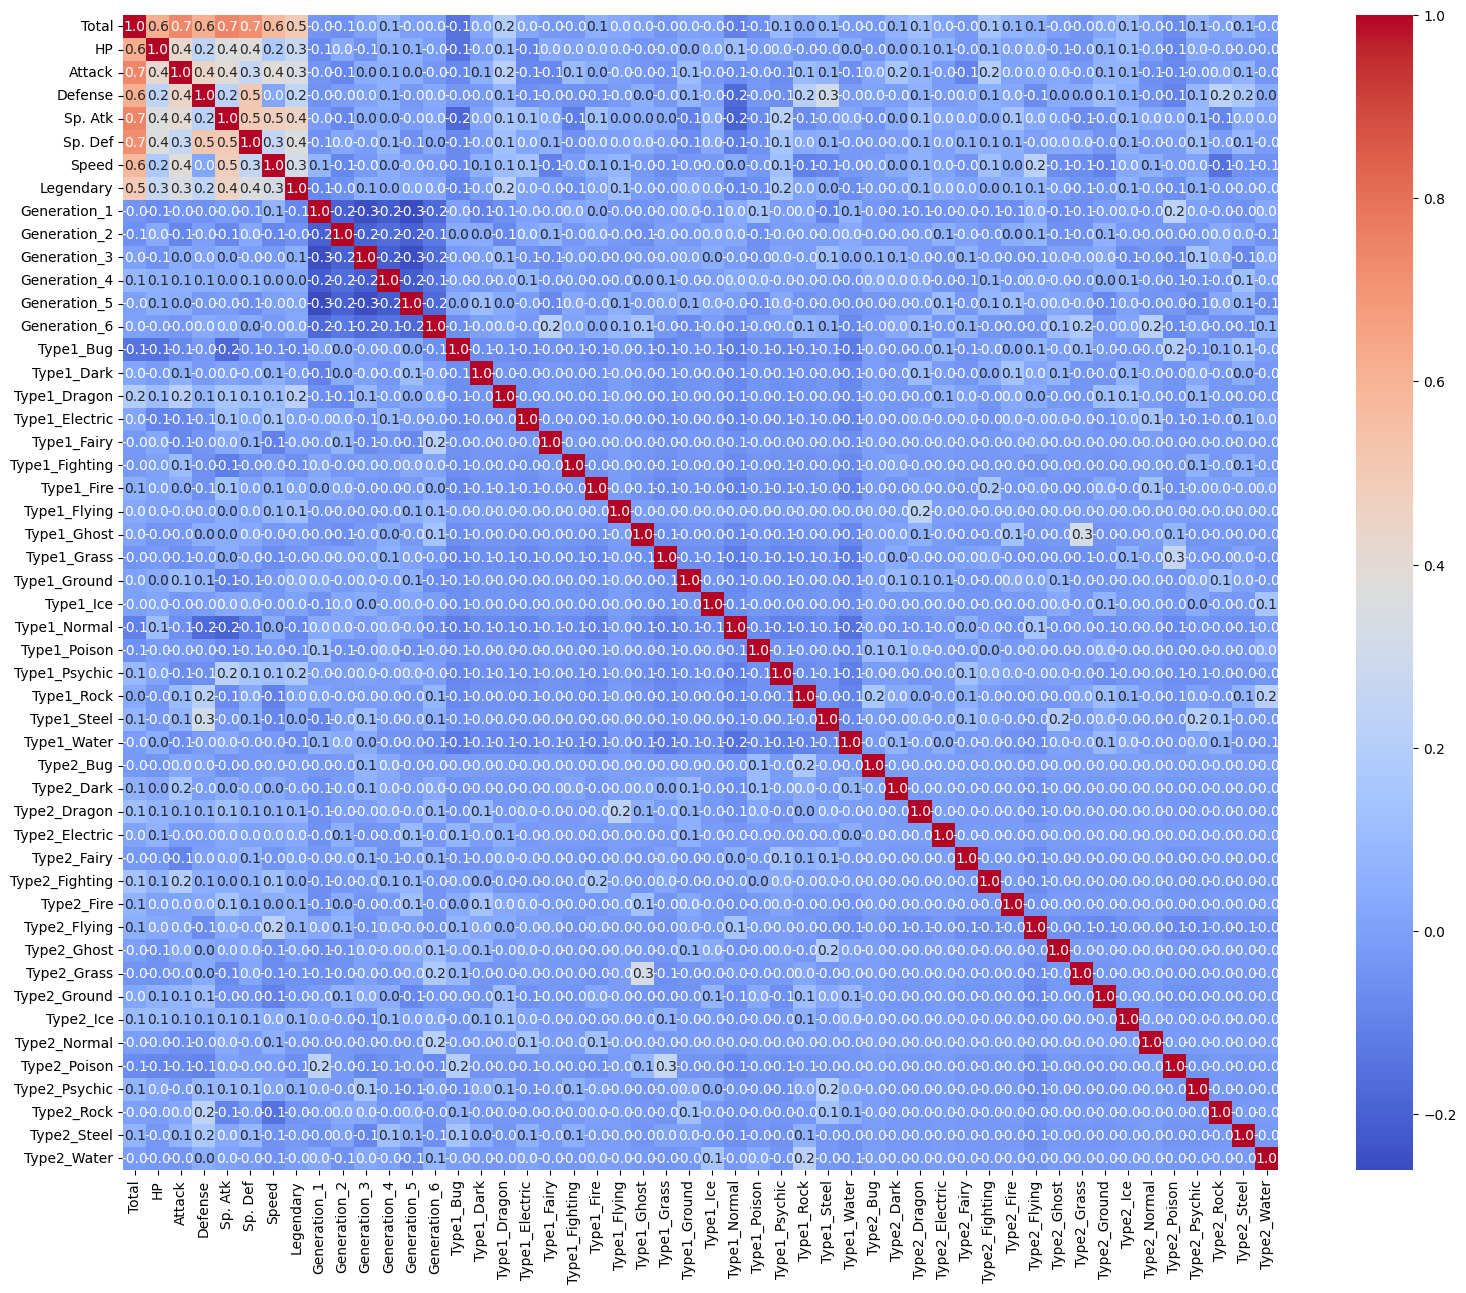

In [78]:
corr_mat = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.1f')

plt.show()

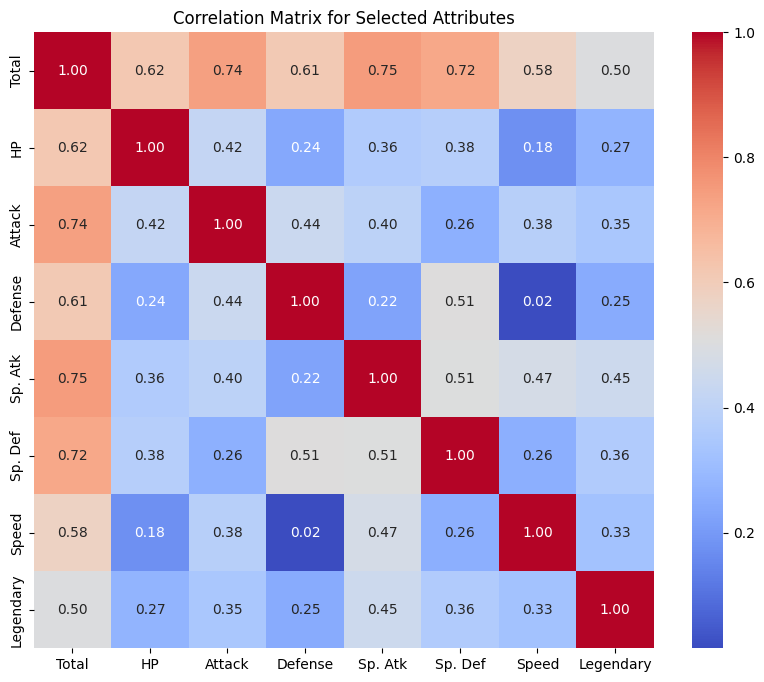

In [80]:
# prompt: make a corr_matrix for Total,HP,Attack,Defense,Sp. Atk, Sp. Def, Speed, Legendary

corr_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']
corr_matrix = df[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Attributes')
plt.show()

TODO popsat

# 1. Shlukování (K-means)

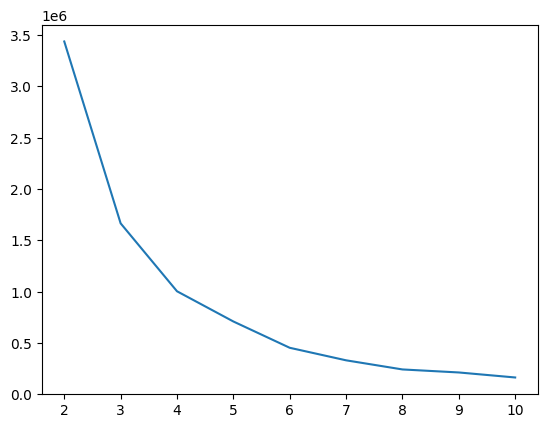

In [86]:
clustering_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(df)
    kmeans.fit(df)
    clustering_scores.append(kmeans.inertia_)

plt.plot(range(2, 11), clustering_scores)
plt.show()

In [97]:
import sklearn.cluster
clusters = sklearn.cluster.KMeans(n_clusters=4, random_state=13).fit(df)

In [98]:
df['cluster_id'] = clusters.labels_

<Axes: xlabel='cluster_id', ylabel='count'>

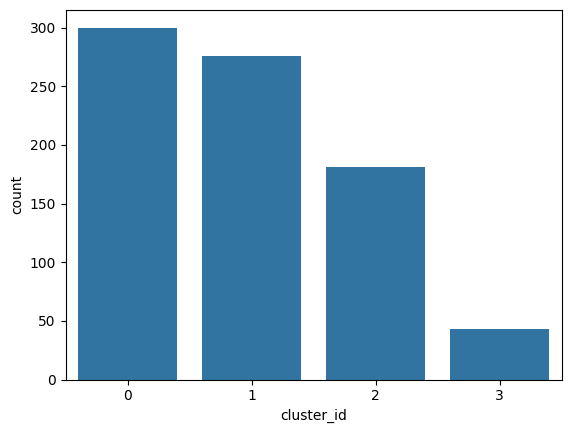

In [99]:
sns.countplot(data=df, x='cluster_id')

In [95]:
df.shape

(800, 51)

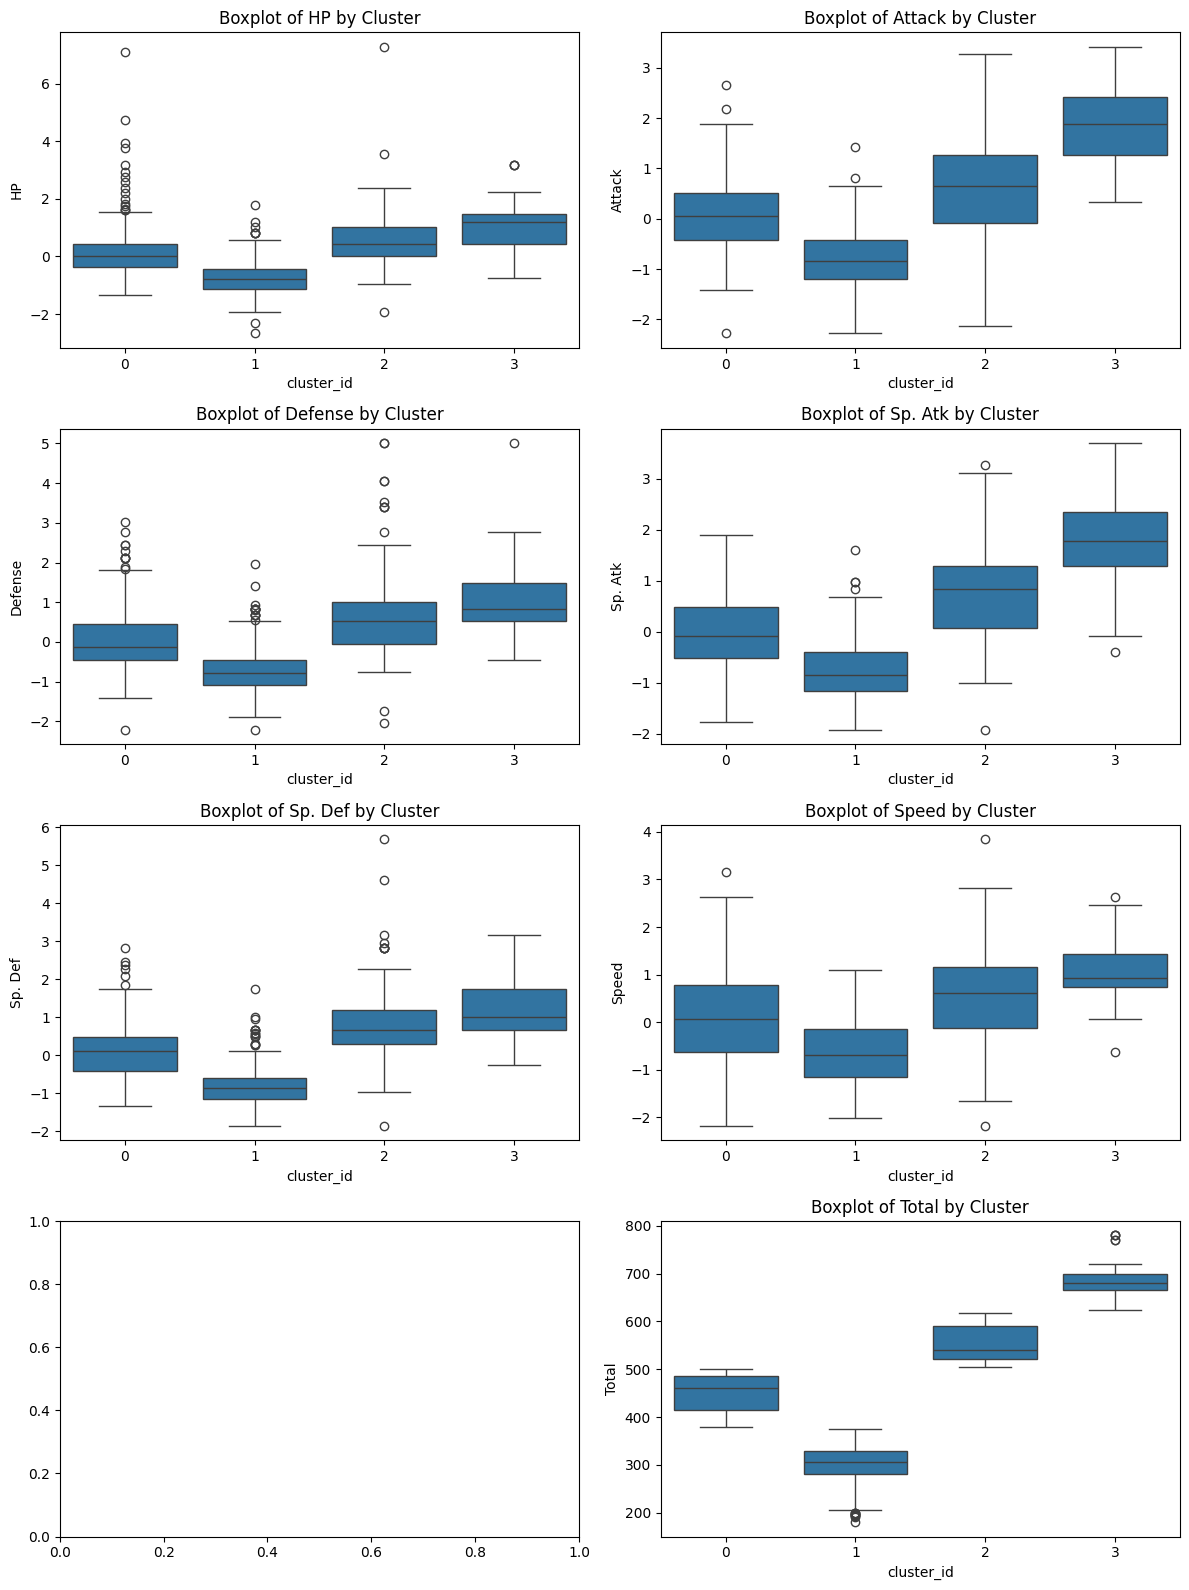

In [100]:
attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation','Total']
num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    # Check if the column exists in X_test before plotting
    if attribute in df.columns:
        sns.boxplot(x='cluster_id', y=attribute, data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot of {attribute} by Cluster')
    else:
        print(f"Warning: Column '{attribute}' not found in X_test. Skipping boxplot.")

if num_attributes % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# 2. Shlukování (Agglomerative Clustering)

# 3. Shlukování (DBSCAN)